<a href="https://colab.research.google.com/github/henilp105/FMML2022-henilp105/blob/main/Module2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 2: Feature Normalization, Nearest Neighbor Revisited
### Project: Binary Classification of Adults 
#### Module Coordinator: Tanvi Kamble
This Entire Experiment has been executed by Henil Panchal .

FMML 2022 ID: fmml20211022@ihub-data.iiit.ac.in
---

This projects requires you to apply the machine learning cocepts that you learnt so far to fill in the #TODO parts so that we can classify which income group an adult lies in. 

An adult's income can be determined by a lot of factors like the individual’s education level, age, gender, occupation, and etc. We use a dataset prsent on Kaggle provided by [UCI](http://www.cs.toronto.edu/~delve/data/adult/desc.html) to perform KNN and find the income group. 

First let's open the dataset stored as a CSV file using pandas dataframe, stored in google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
adult = pd.read_csv('/content/adult.csv')

In [6]:
# Looking at the dataset
adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
# Removing duplicate entries
adult=adult.drop_duplicates()

In [8]:
# Let's get to know the dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


In [10]:
# Adding Index Column so that each entry is identified independently
adult['Index'] = range(1, len(adult) + 1)

In [11]:
adult = adult.set_index('Index')

This dataset has '?' in place of all Null entries. Let's find the total null entries.

In [12]:
adult.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [13]:
df = adult.copy()

In [14]:
df['income'] = df['income'].replace('nan', np.nan)
df = df[df['income'].isin([np.nan]) == False]

In [15]:
#  Three classes called Workclass, Occupation and Native-Country have null values so we first replace it with np.nan. 
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

These three features are categorical in nature so performing Imputation based KNN will be the best option to find out the missing features. 

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
df.gender=lb.fit_transform(df.gender)
df.income=lb.fit_transform(df.income)

In [17]:
df.isin([np.nan]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [19]:
# For the NULL values of capital loss and hours per week feature perfrom imputation by mean. 
df['capital-loss'] = np.nanmean(df['capital-loss'])
df['hours-per-week'] = np.nanmean(df['hours-per-week'])

In [20]:
# IMPUTATION USING K-NN
# Workclass
x_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].workclass
y_train_workclass = lb.fit_transform(y_train_workclass)
for itr, ind in enumerate(x_train_workclass.index):
  df['workclass'][ind] = y_train_workclass[itr]
x_test_workclass = df.loc[df['workclass'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Occupation
x_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].occupation
y_train_occupation = lb.fit_transform(y_train_occupation)
for itr, ind in enumerate(x_train_occupation.index):
  df['occupation'][ind] = y_train_occupation[itr]
x_test_occupation = df.loc[df['occupation'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Native Country
x_train_country = df.loc[df['native-country'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_country = df.loc[df['native-country'].isin([np.nan]) == False]['native-country']
y_train_country = lb.fit_transform(y_train_country)
for itr, ind in enumerate(x_train_country.index):
  df['native-country'][ind] = y_train_country[itr]
x_test_country = df.loc[df['native-country'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
workplace_pred = None
occupation_pred = None
country_pred = None

def findMissingByKNN(X_train,y_train,X_test,k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  return knn.predict(X_test)

k = 7
workplace_pred = findMissingByKNN(x_train_workclass,y_train_workclass,x_test_workclass,k)
occupation_pred = findMissingByKNN(x_train_occupation,y_train_occupation,x_test_occupation,k)
country_pred = findMissingByKNN(x_train_country,y_train_country,x_test_country,k)


In [24]:
# Replacing the predicted values in the original dataframe
for itr, ind in enumerate(x_test_workclass.index):
  df['workclass'][ind] = workplace_pred[itr]

for itr, ind in enumerate(x_test_occupation.index):
  df['occupation'][ind] = occupation_pred[itr]

for itr, ind in enumerate(x_test_country.index):
  df['native-country'][ind] = country_pred[itr]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
df['workclass'] = df['workclass'].astype(str).astype(int)
df['occupation'] = df['occupation'].astype(str).astype(int)
df['native-country'] = df['native-country'].astype(str).astype(int)

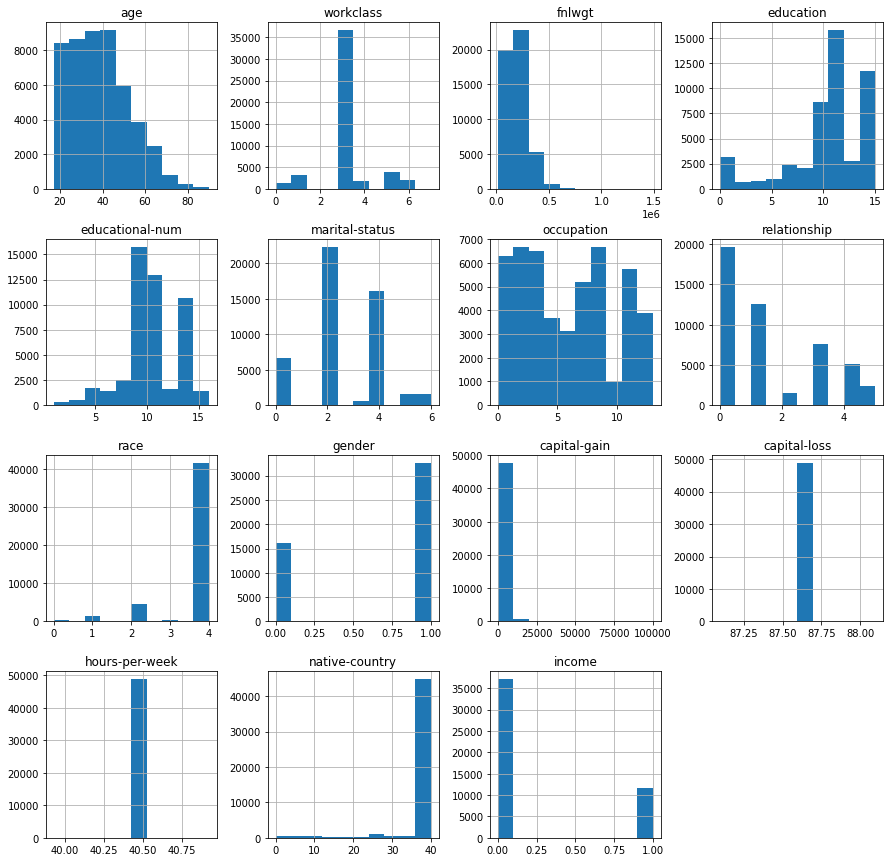

In [26]:
p = df.hist(figsize = (15,15))

After plotting the figures we can see that there is some scope for clipping fnlwgt, capital loss and capital gain with vmax. 

In [31]:
df['capital-gain'].describe()

count    48790.000000
mean      1080.217688
std       7455.905921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [32]:
df['capital-loss'].describe()

count    4.879000e+04
mean     8.759557e+01
std      3.618121e-11
min      8.759557e+01
25%      8.759557e+01
50%      8.759557e+01
75%      8.759557e+01
max      8.759557e+01
Name: capital-loss, dtype: float64

In [30]:
df_standard = df.copy()
vmax_cap_gain = 0
vmax_cap_loss = 0
vmax_fnlwgt = 0
df_standard['capital-loss'] = df_standard['capital-loss']
df_standard['capital-gain'] = df_standard['capital-gain']
df_standard['fnlwgt'] = df_standard['fnlwgt']

In [28]:
df_standard = df_standard.dropna(how = 'all')

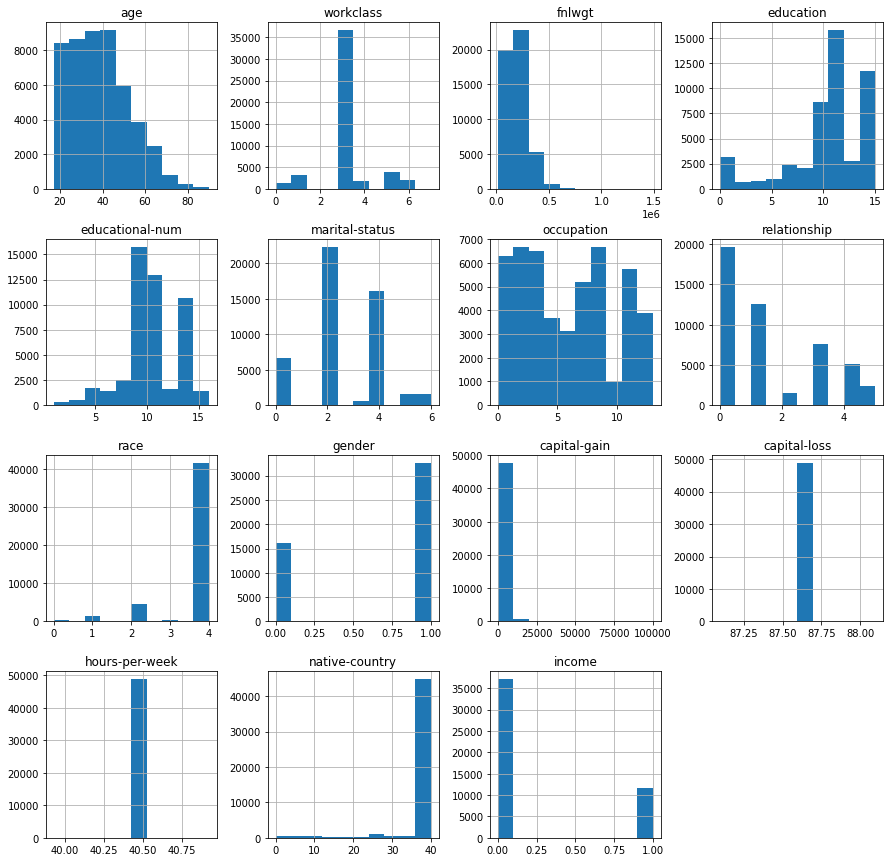

In [29]:
# Let's plot the same graph for standardized data
p = df_standard.hist(figsize = (15,15))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 87.59557286329166 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 40.42588645214183 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 87.59557286329166 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 87.59557286329166 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_li

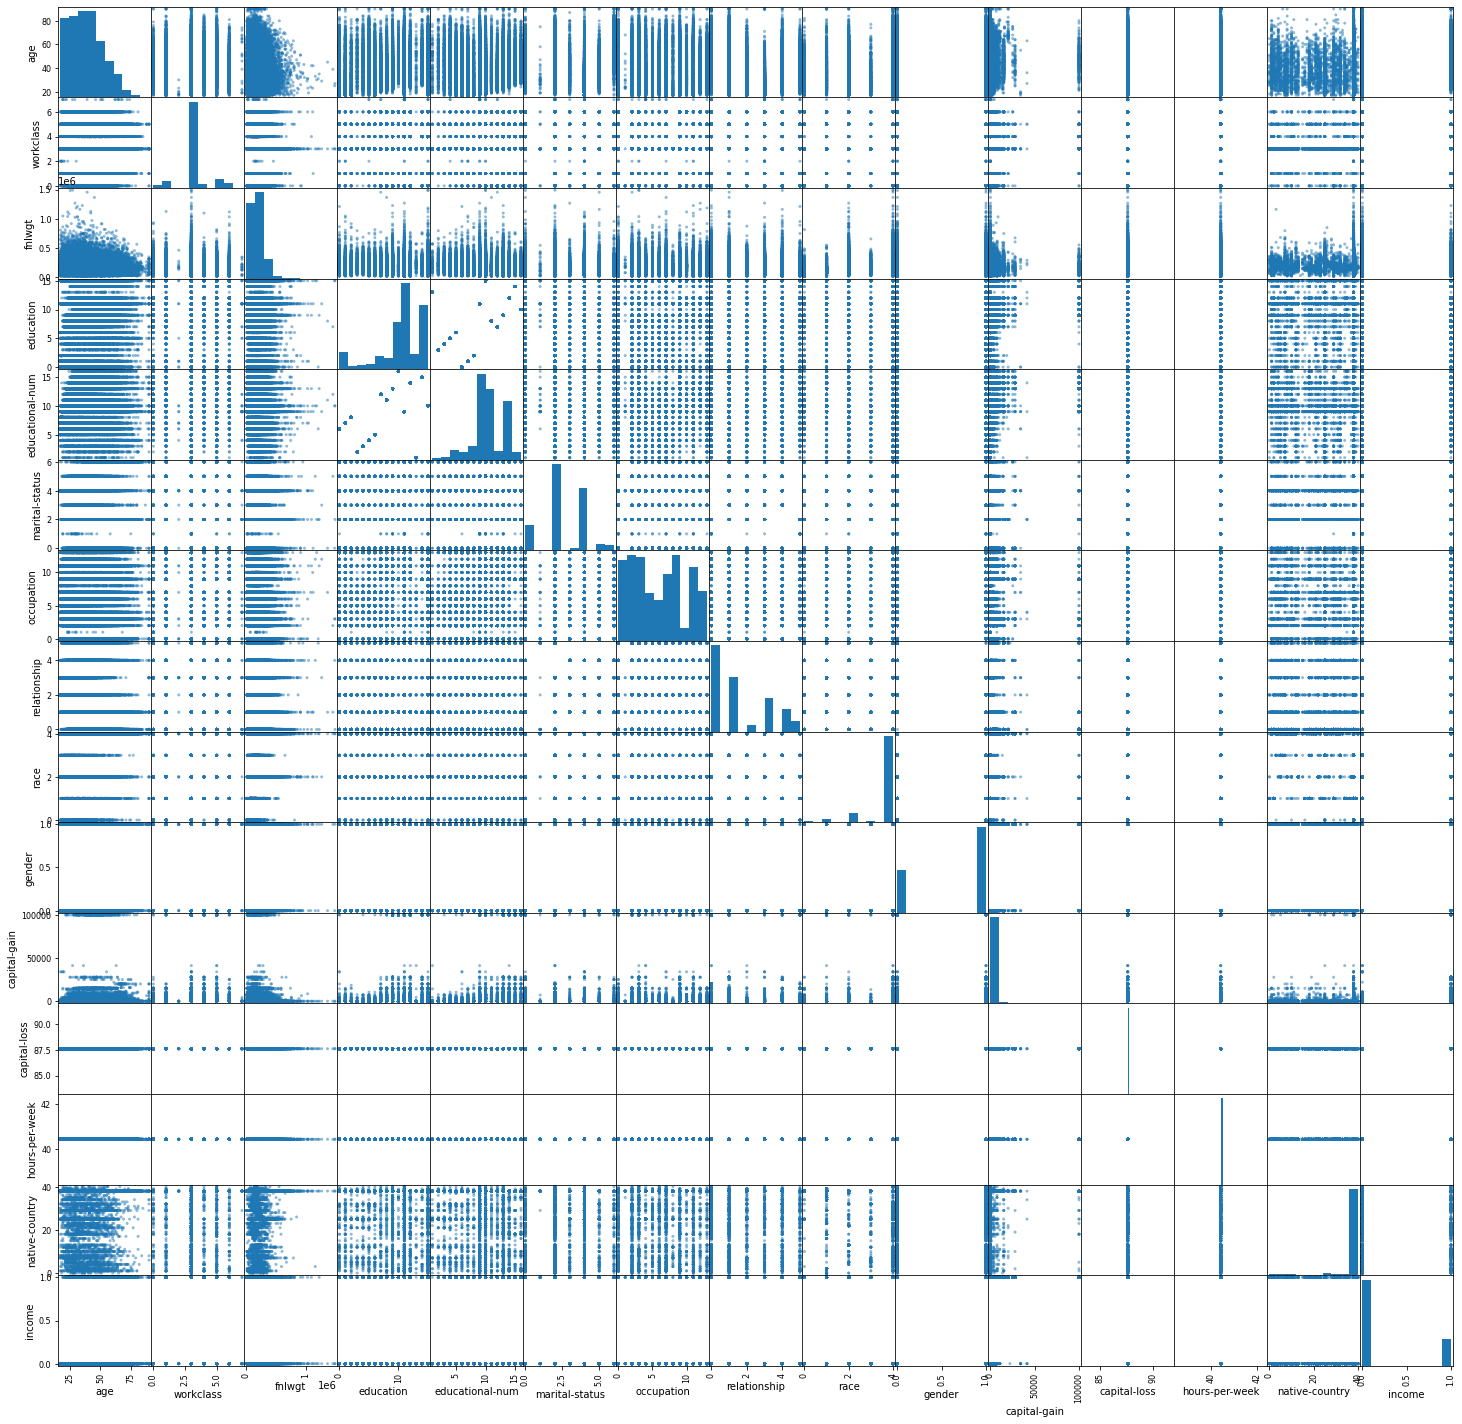

In [33]:
# Let's plot the various features now and see if we can find any useless features not required for KNN
from pandas.plotting import scatter_matrix
p = scatter_matrix(df,figsize=(25, 25))


In [34]:
# Let's analyse the same using correlation map. 
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.045513,-0.076451,-0.015142,0.030635,-0.263594,-0.009687,-0.263395,0.028803,0.088043,0.077185,NaN,NaN,-0.002581,0.230144
workclass,0.045513,1.000000,-0.026954,0.005301,0.007134,-0.020284,0.015915,-0.056033,0.054307,0.066829,0.031700,NaN,NaN,-0.004855,-0.000529
fnlwgt,-0.076451,-0.026954,1.000000,-0.022539,-0.038727,0.029779,-0.002108,0.009017,-0.027165,0.027879,-0.003715,NaN,NaN,-0.058146,-0.006309
education,-0.015142,0.005301,-0.022539,1.000000,0.359825,-0.037449,-0.029820,-0.010861,0.013387,-0.027120,0.028958,NaN,NaN,0.075107,0.080118
educational-num,0.030635,0.007134,-0.038727,0.359825,1.000000,-0.069859,0.093837,-0.090697,0.029331,0.009364,0.125219,NaN,NaN,0.089113,0.332802
marital-status,-0.263594,-0.020284,0.029779,-0.037449,-0.069859,1.000000,0.008086,0.187770,-0.070111,-0.127505,-0.043924,NaN,NaN,-0.017798,-0.198855
occupation,-0.009687,0.015915,-0.002108,-0.029820,0.093837,0.008086,1.000000,-0.057342,0.000159,0.061064,0.020587,NaN,NaN,-0.002970,0.053370
relationship,-0.263395,-0.056033,0.009017,-0.010861,-0.090697,0.187770,-0.057342,1.000000,-0.116985,-0.579955,-0.056543,NaN,NaN,-0.007484,-0.253175
race,0.028803,0.054307,-0.027165,0.013387,0.029331,-0.070111,0.000159,-0.116985,1.000000,0.086959,0.011610,NaN,NaN,0.120004,0.070970
gender,0.088043,0.066829,0.027879,-0.027120,0.009364,-0.127505,0.061064,-0.579955,0.086959,1.000000,0.047127,NaN,NaN,-0.002152,0.214639


### Observations
For the income column it is clear that no column directly affects the Income. We can safely assume that there no feature will completely overpower and determine the outcome. Hence, no need for regularization.  

0    37109
1    11681
Name: income, dtype: int64


<BarContainer object of 2 artists>

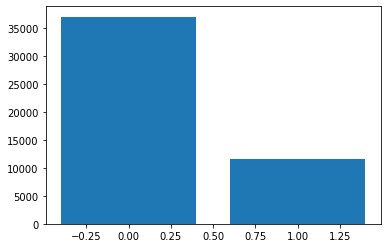

In [35]:
# Checking if the data is biased
print(df['income'].value_counts())
plt.bar([0,1],df['income'].value_counts())

### Observations
There is a clear bias in the data and our model might end up giving income as 0 for most cases

In [36]:
# Next we want to Z-Scale the data 
from sklearn.preprocessing import StandardScaler

In [39]:
scaled_data = None
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('income',1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
df_scaled = pd.DataFrame(scaled_data,columns=df_standard.columns[:-1])
df_scaled.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995947,-0.089454,0.351584,-2.397162,-1.197970,0.916478,0.030917,0.971279,-1.971227,0.704261,-0.144882,0.0,0.0,0.260284
1,-0.047620,-0.089454,-0.945452,0.183765,-0.419766,-0.409903,-0.464960,-0.900732,0.392492,0.704261,-0.144882,0.0,0.0,0.260284
2,-0.777103,-1.884429,1.394503,-0.848606,0.747540,-0.409903,1.022673,-0.900732,0.392492,0.704261,-0.144882,0.0,0.0,0.260284
3,0.390069,-0.089454,-0.277855,1.216135,-0.030664,-0.409903,0.030917,-0.900732,-1.971227,0.704261,0.886257,0.0,0.0,0.260284
4,-1.506585,-0.089454,-0.815898,1.216135,-0.030664,0.916478,-0.217021,0.971279,0.392492,-1.419928,-0.144882,0.0,0.0,0.260284


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
def plot_KNN_error_rate(xdata,ydata,weights='uniform',cv=1):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(xdata,ydata,train_size=0.7)
  
  for i in range(1,15):
      ## [REQUIRED] Complete the code in the next three lines
      knn = KNeighborsClassifier(n_neighbors=i,weights=weights)
      knn.fit(X_train,y_train)
      pred_i = knn.predict(X_test)
      
      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))
  if(cv==1):
    plt.figure(figsize=(12,8))
    plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print()
    ## score that comes from testing on the same datapoints that were used for training
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
    print()
    ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

    return test_scores
  else:
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    #print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
    best_k = list(map(lambda x: x+1, test_scores_ind))[0]

    k_fold_res = cross_val_score(knn,xdata,ydata,cv=cv) #results of k fold validation
    return [best_k,k_fold_res]



Max train score 99.96486399437823 % and k = [1]

Max test score 80.03689280590285 % and k = [14]


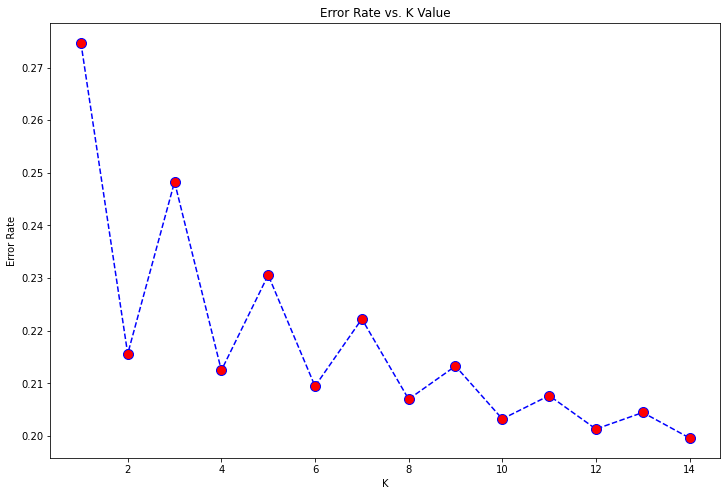

In [43]:
# Unchanged dataset
orig_X = df.drop('income', axis = 1)
orig_y = df.income
unchanged_test_scores = plot_KNN_error_rate(orig_X, orig_y)


Max train score 99.96779199484672 % and k = [1]

Max test score 83.29575732732117 % and k = [13]


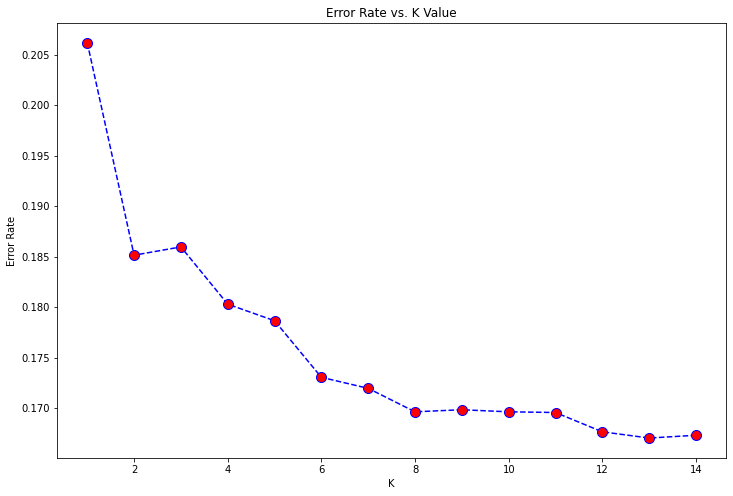

In [44]:
# Standardized Dataset
scaled_X = df_scaled
scaled_y = df_standard.income
scaled_test_scores = plot_KNN_error_rate(scaled_X, scaled_y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


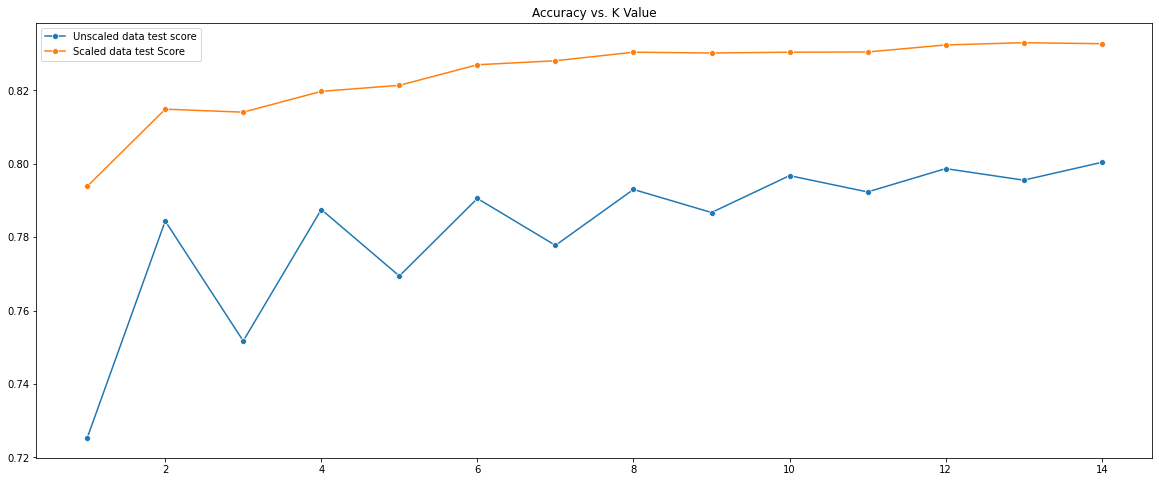

In [45]:
# Comparing the two accuracies
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,15),unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(range(1,15),scaled_test_scores,marker='o',label='Scaled data test Score')


Max train score 99.9560799929728 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Max test score 78.5953405752545 % and k = [14]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


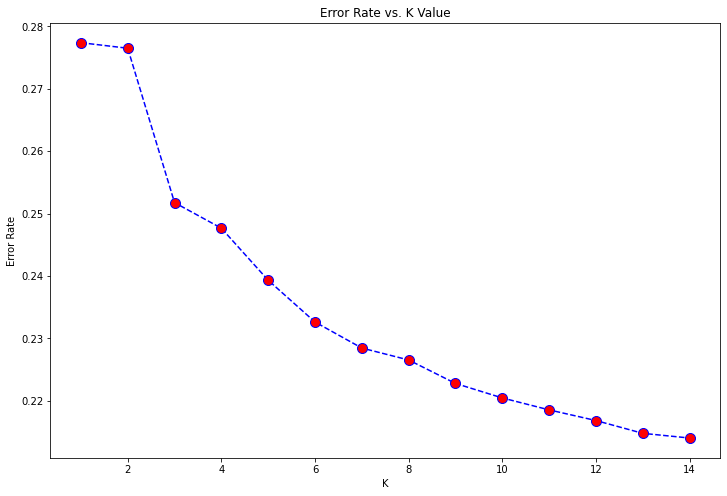

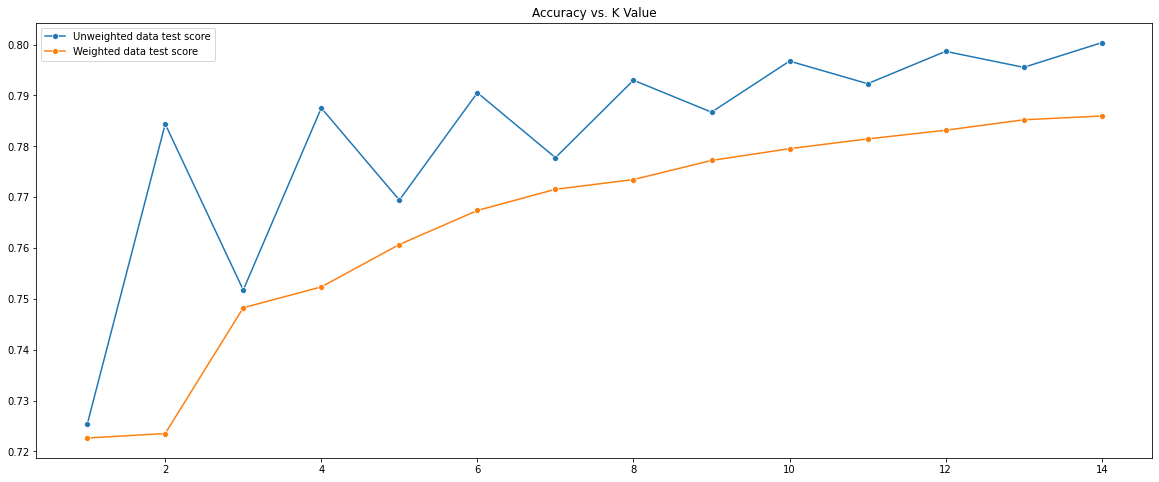

In [46]:
weighted_KNN_test_scores = plot_KNN_error_rate(orig_X, orig_y,weights="distance")
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,15),unchanged_test_scores,marker='o',label='Unweighted data test score')
sns.lineplot(range(1,15),weighted_KNN_test_scores,marker='o',label='Weighted data test score')

In [47]:
k = 5
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

# Conclusion

We carried out data analysis which helped us realise the missing values and helped us check if there is any visible bias in the data. 

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

## References
https://www.kaggle.com/wenruliu/adult-income-dataset